# TASK 1: UNDERSTAND THE PROBLEM STATEMENT

### KYPHOSIS DISEASE CLASSIFICATION
Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output.
INPUTS:

+ Age: in months
- Number: the number of vertebrae involved
* Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:

+ Kyphosis: a factor with levels "absent" or "present" indicating if a kyphosis (a type of deformation) was present after the operation.

Link to dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

*Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S,Wadsworth and Brooks/Cole, Pacific Grove, CA.*

# TASK #2: IMPORT LIBRARIES AND DATASETS


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [16]:
Kyphosis_df = pd.read_csv('kyphosis.csv')

In [17]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [18]:
Kyphosis_df.tail(7)

,Kyphosis,Age,Number,Start
74,absent,11,3,15
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [19]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


# TASK #3: PERFORM DATA VISUALIZATION

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [30]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [32]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [33]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [34]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


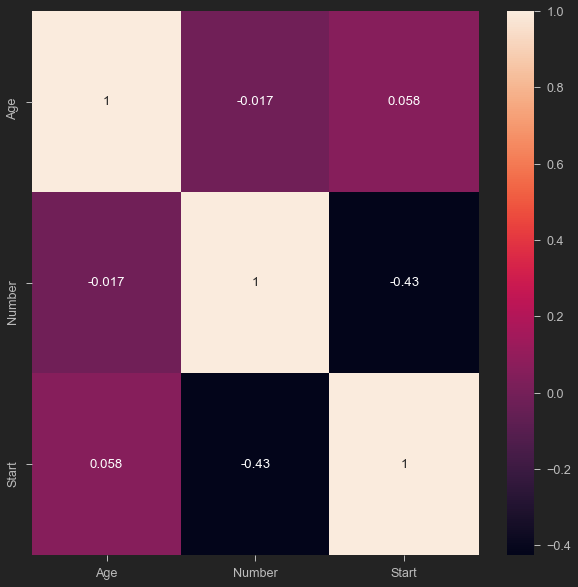

In [36]:
plt.figure(figsize=(10,10)) 
sns.heatmap(kyphosis_df.corr(), annot = True)

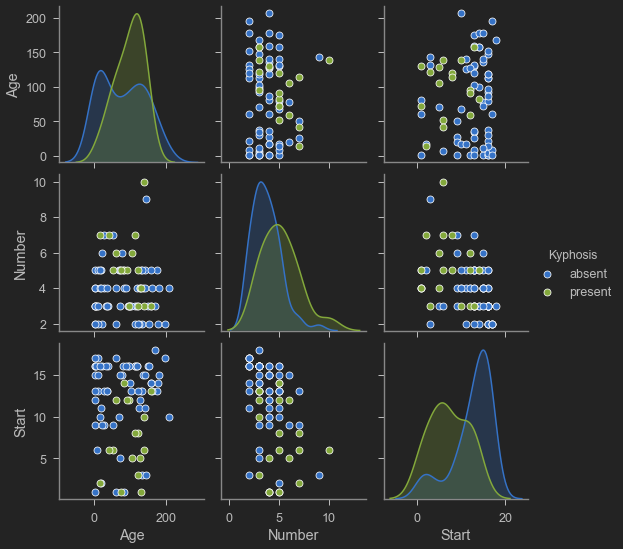

In [38]:
sns.pairplot(Kyphosis_df, hue = 'Kyphosis')


**Plot the data countplot showing how many samples belong to each class**

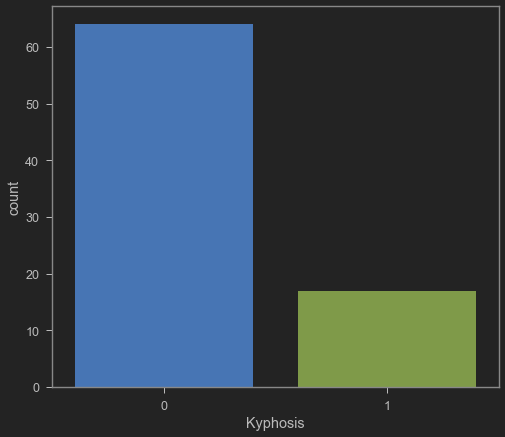

In [40]:
sns.countplot(x = Kyphosis_df['Kyphosis'], label = "Count")

# TASK #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [41]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'], axis = 1)
y = Kyphosis_df['Kyphosis']

In [42]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [43]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
X_train.shape

(64, 3)

In [48]:
X_test.shape

(17, 3)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# TASK #5: TRAIN A LOGISTIC REGRESSION CLASSIFIER MODEL

In [49]:
X_train.shape

(64, 3)

In [50]:
y_train.shape

(64,)

In [51]:
X_test.shape

(17, 3)

In [52]:
y_test.shape

(17,)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE 

In [57]:
from sklearn.metrics import classification_report, confusion_matrix


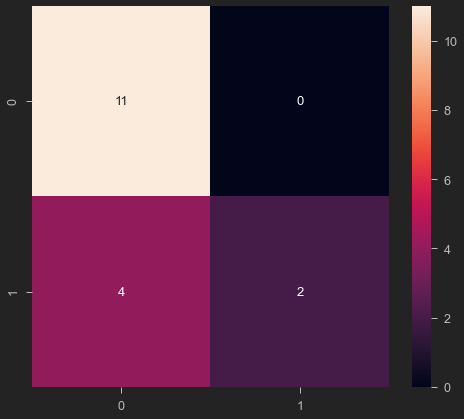

In [61]:
# Predicting the Test set results
y_predict_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [62]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.33      0.50         6

    accuracy                           0.76        17
   macro avg       0.87      0.67      0.67        17
weighted avg       0.83      0.76      0.72        17



# TASK #7: IMPROVE THE MODEL 

In [63]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

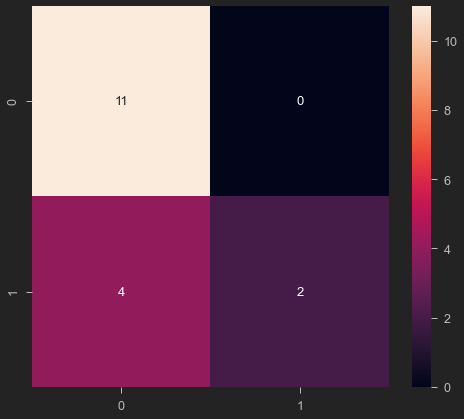

In [64]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [65]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.33      0.50         6

    accuracy                           0.76        17
   macro avg       0.87      0.67      0.67        17
weighted avg       0.83      0.76      0.72        17



In [66]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Age       0.405132
Start     0.344387
Number    0.250481
